# Импорты и используемыe файлы

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns


plt.style.use('default')

nafld_1 = pd.read_csv('data/nafld1.csv')
nafld_2 = pd.read_csv('data/nafld2.csv')
nwtco = pd.read_csv('data/nwtco.csv')

# Базовое знакомство с данными

## __Датасет nafld1__

In [2]:
nafld_1.info()
nafld_1.head()
nafld_1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


(17549, 10)

bmi        28.269417
weight     27.272209
height     18.052311
case.id     0.176648
dtype: float64


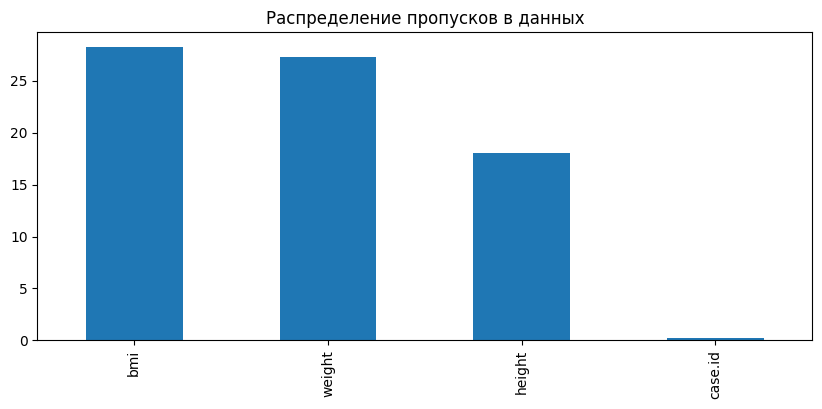

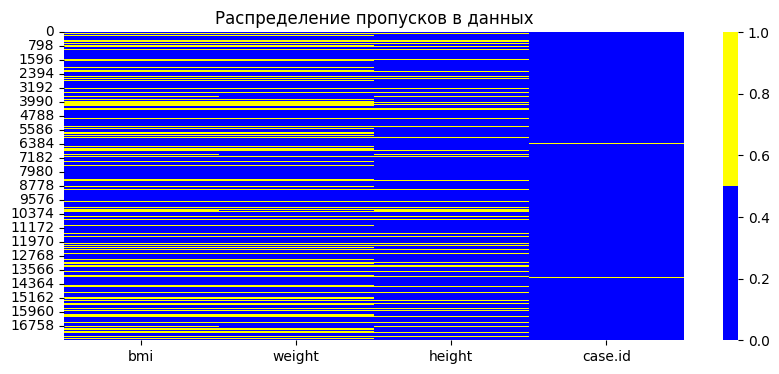

In [3]:
cols_null_nafld1 = nafld_1.isnull().mean() * 100
cols_null_nafld1 = cols_null_nafld1[cols_null_nafld1>0].sort_values(ascending=False)
print(cols_null_nafld1)

cols_null_nafld1.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_null_nafld1.index
ax = sns.heatmap(
    nafld_1[cols].isnull(),
    cmap=sns.color_palette(colors),
)
ax.set_title('Распределение пропусков в данных');

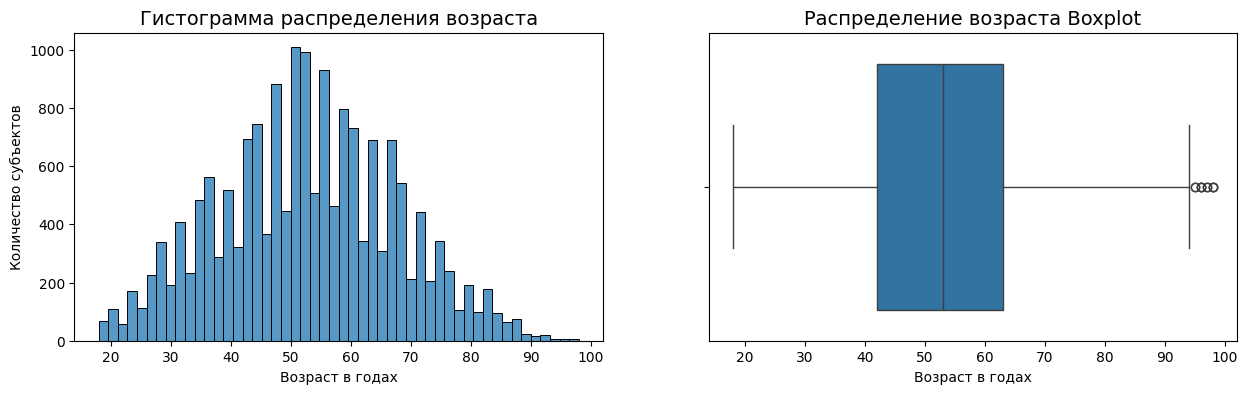

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nafld_1, x='age', ax=axes[0]);
histplot.set_title('Гистограмма распределения возраста', fontsize=14);
histplot.set_xlabel('Возраст в годах', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=nafld_1, x='age', ax=axes[1]);
boxplot.set_title('Распределение возраста Boxplot', fontsize=14);
boxplot.set_xlabel('Возраст в годах', fontsize=10);

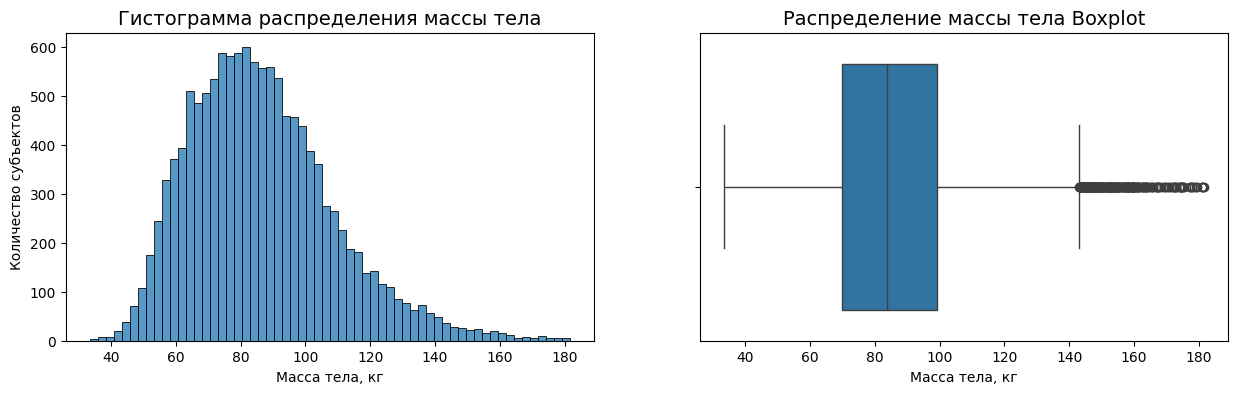

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nafld_1, x='weight', ax=axes[0]);
histplot.set_title('Гистограмма распределения массы тела', fontsize=14);
histplot.set_xlabel('Масса тела, кг', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=nafld_1, x='weight', ax=axes[1]);
boxplot.set_title('Распределение массы тела Boxplot', fontsize=14);
boxplot.set_xlabel('Масса тела, кг', fontsize=10);


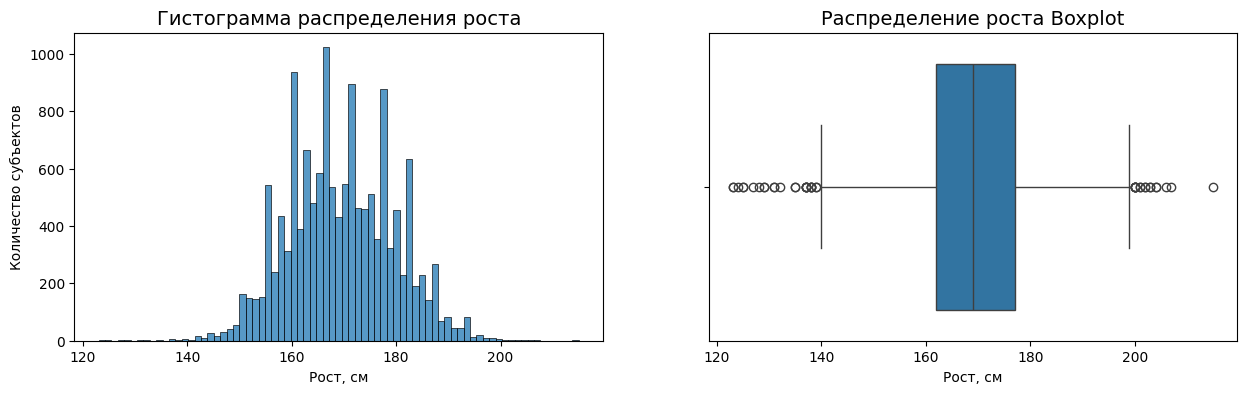

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nafld_1, x='height', ax=axes[0]);
histplot.set_title('Гистограмма распределения роста', fontsize=14);
histplot.set_xlabel('Рост, см', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=nafld_1, x='height', ax=axes[1]);
boxplot.set_title('Распределение роста Boxplot', fontsize=14);
boxplot.set_xlabel('Рост, см', fontsize=10);


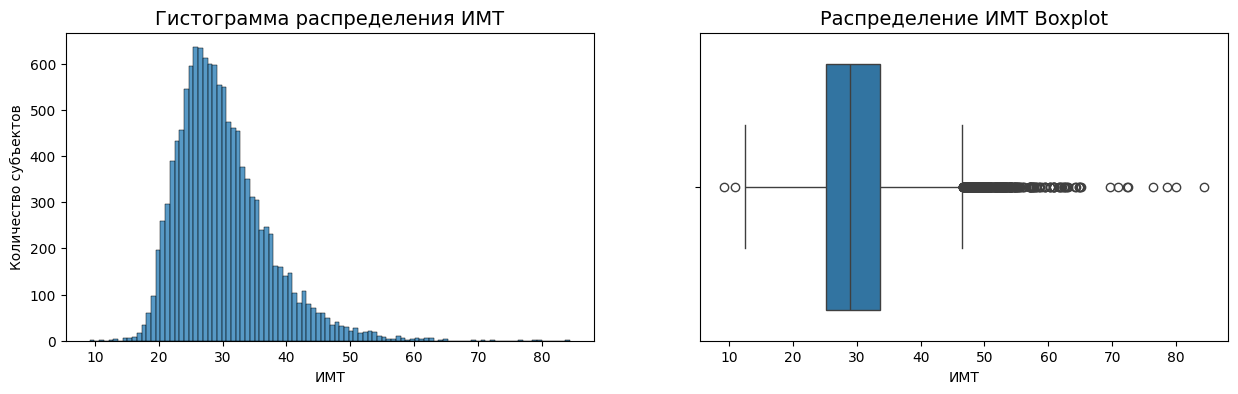

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nafld_1, x='bmi', ax=axes[0]);
histplot.set_title('Гистограмма распределения ИМТ', fontsize=14);
histplot.set_xlabel('ИМТ', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=nafld_1, x='bmi', ax=axes[1]);
boxplot.set_title('Распределение ИМТ Boxplot', fontsize=14);
boxplot.set_xlabel('ИМТ', fontsize=10);

### Выводы по датасету __nafld_1__
Датасет состоит из 10 столбцов и 17549 строк, в нём отражены основные данные субъекта: id, возраст в годах, пол (0-женский, 1-мужской), масса тела в кг, рост в см, ИМТ, идентификатор случая НАЖБП, время наблюдения в днях, статус пациента (1 — умерший, 0 — живой на момент последнего визита).

Основная часть пропусков в признаках: масса тела, рост и ИМТ; но и в них доля пропусков не превышает 30%, а это значит, что при очистке данных лучше удалить отдельные записи, а не весь признак. 

Признак массы тела похож на нормальное распределение: форма колокола с левой симметрией, но с большим количеством выбросов, которые, однако, укладываются в логические рамки. Я допускаю, что пациент с НАЖБП может иметь массу тела от 140 до 200кг.

Распределение роста вызывает сомнения, есть выбросы вправо и влево, рост начинается от 120см, хотя возраст субъектов от 20лет. Рост меньше 140см и больше 210 см хоть и возможен, но повлияет на результаты.

Признак ИМТ имеет два выброса влево, их я удалю.

ИМТ напрямую зависит от массы тела и роста, поэтому распределение ИМТ я буду анализировать после удаления выбросов.




## __Датасет nafld2__

In [8]:
nafld_2.info()
nafld_2.head()
nafld_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400123 entries, 0 to 400122
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  400123 non-null  int64  
 1   id          400123 non-null  int64  
 2   days        400123 non-null  int64  
 3   test        400123 non-null  object 
 4   value       400123 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.3+ MB


(400123, 5)

In [9]:
nafld_2.head(100)

,Unnamed: 0,id,days,test,value
0,135077,1,-459,hdl,75.0
1,313143,1,-459,chol,75.0
2,135078,1,183,hdl,64.0
3,313144,1,183,chol,64.0
4,135079,1,2030,hdl,74.0
...,...,...,...,...,...
95,207463,7,-1585,hdl,58.0
96,385552,7,-1585,chol,58.0
97,207464,7,-301,hdl,75.0
98,385553,7,-301,chol,75.0


In [10]:
print(f'Исследуемые показатели в test: {list(nafld_2['test'].unique())}')
print(f'Число субъектов в nafld_2: {nafld_2['id'].nunique()}')
print(f'Число субъектов в nafld_1: {nafld_1['id'].nunique()}')

Исследуемые показатели в test: ['hdl', 'chol', 'sbp', 'dbp', 'fib4', 'smoke']
Число субъектов в nafld_2: 15666
Число субъектов в nafld_1: 17549


In [11]:
nafld_2[nafld_2['test'] == 'smoke']

,Unnamed: 0,id,days,test,value
400,9941,19,968,smoke,1.0
403,9942,19,1363,smoke,0.0
488,12144,25,953,smoke,0.0
539,6663,26,-380,smoke,0.0
540,6664,26,-171,smoke,1.0
...,...,...,...,...,...
399801,8872,17549,3065,smoke,0.0
399977,4561,17559,-365,smoke,0.0
399978,4562,17559,331,smoke,1.0
400063,4678,17563,3122,smoke,0.0


In [12]:
cols_null_nafld2 = nafld_2.isnull().mean() * 100
print(cols_null_nafld2)

Unnamed: 0    0.0
id            0.0
days          0.0
test          0.0
value         0.0
dtype: float64


### Выводы по датасету __nafld_2__
Датасет состоит из 5 столбцов и 400123 строк, в нём отражены: id, дата измерения, тип записанных данных (ЛПВП, общий холестерин, уровень САД, уровень ДАД, индекс фиброза печени, факт курения), значение записанных данных, а также неинформмативный столбец 'Unnamed: 0', его следует удалить.

В данном датасете уникальному id соответствует несколько записей, которые отличаются типом записанных данных. Для удобства таблицу нужно перевести в широкую, в колонках которой будут отдельные показатели (test). Показатели замеряли неоднократно, в разные дни наблюдения, т.е. оценивались в динамике. Я оставлю первый и последний день измерения показателя и отражу в широком варианте. Промежуточные результаты сложно интерпретировать в большом датасете, т.к. продолжительность наблюдения, дни измерения показателей у каждого из субъектов отличаются. Отдельно можно разбить датасет на отдельные таблицы по id субъекта и оценивать индивидуальную динамику.

На первый взгляд, пропусков нет, но нужно проверить ЛПВП, ОХ, САД, ДАД, индекс фиброза на значение 0, после того, как я переведу таблицу в широкую. Также отличается количество уникальных id, в nafld_2 их больше. Объединение буду проводить по совпадающим id, остальные удалю.

Визуализация затруднительна до перевода таблицы в широкий формат.



## __Датасет nwtco__

In [13]:
nwtco.info()
nwtco.head()
nwtco.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    4028 non-null   int64
 1   seqno         4028 non-null   int64
 2   instit        4028 non-null   int64
 3   histol        4028 non-null   int64
 4   stage         4028 non-null   int64
 5   study         4028 non-null   int64
 6   rel           4028 non-null   int64
 7   edrel         4028 non-null   int64
 8   age           4028 non-null   int64
 9   in.subcohort  4028 non-null   bool 
dtypes: bool(1), int64(9)
memory usage: 287.3 KB


(4028, 10)

In [14]:
nwtco.head()

,Unnamed: 0,seqno,instit,histol,stage,study,rel,edrel,age,in.subcohort
0,1,1,2,2,1,3,0,6075,25,False
1,2,2,1,1,2,3,0,4121,50,False
2,3,3,2,2,1,3,0,6069,9,False
3,4,4,2,1,4,3,0,6200,28,True
4,5,5,2,2,2,3,0,1244,55,False


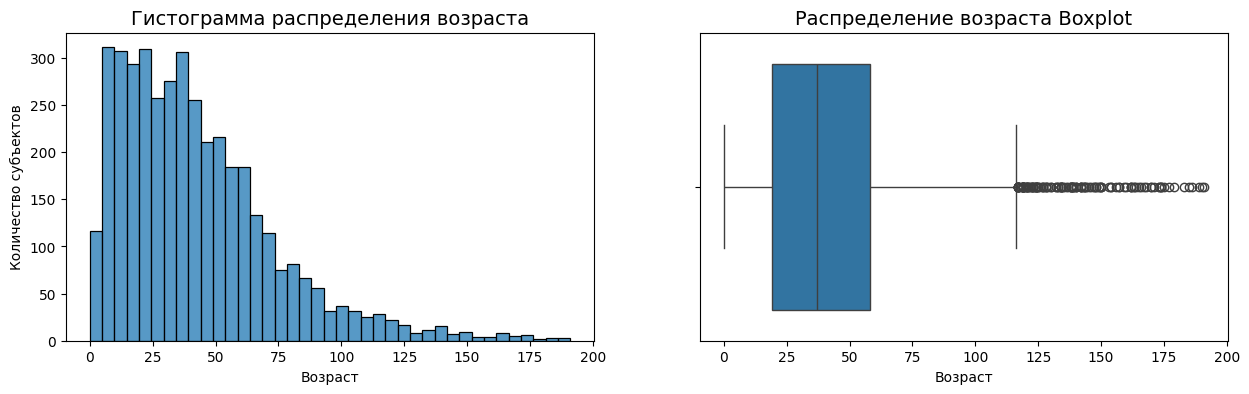

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=nwtco, x='age', ax=axes[0]);
histplot.set_title('Гистограмма распределения возраста', fontsize=14);
histplot.set_xlabel('Возраст', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);

boxplot = sns.boxplot(data=nwtco, x='age', ax=axes[1]);
boxplot.set_title('Распределение возраста Boxplot', fontsize=14);
boxplot.set_xlabel('Возраст', fontsize=10);


### Выводы по датасету __nwtco__
Датасет состоит из 10 столбцов и 4028 строк, в нём отражены: номер записи, код МО, гистологический тип опухоли, стадия опухоли, код исследования, статус рецидива, время до рецидива, возраст пациента, принадлежность к исследованию.

Распределение возраста вызывает недоумение: большое количество выбросов вправо, от 120. Очень много субъектов в возрасте от 120 (лет?) Возможно, возраст указан не годах, а месяцах. 

Датасет nwtco не имеет никакого отношения к первым двум датасетам.


# Предобработка данных

Предобработка датасета nafld_1: удалить неинформативный столбец 'Unnamed: 0', удалить дубликаты.

Предобработка датасета nafld_2: удалить неинформативный столбец 'Unnamed: 0'; удалить дубликаты; перевести датасет в широкий формат, где одному id соотвествует одна запись. 

Я не понимаю и не могу найти информацию о том, почему days в некоторых случаях имеют отрицательные значения. Отрицательные значения могут быть: показателями субъекта до даты входа в исследование (до индексации), либо это ошибка сбора данных. Для оценки динамики я буду исходить из того, что отрицательный день был раньше любого положительного. 

Объединить три датасета невозможно с логической точки зрения, в третьем датасете явно речь о детях. Нельзя объединить отождествляя порядковый номер записи и id, потому что тогда придется решать какой возраст верный. 

В связи с тем, что количество id в nafld_1 и nafld_2 разное, объединение будет по совпадающим id.

In [16]:
# Удаляю столбец Unnamed и дубликаты в nafld_1
nafld_1 = nafld_1.drop(columns='Unnamed: 0', axis=1)
nafld_1.drop_duplicates()

,id,age,male,weight,height,bmi,case.id,futime,status
0,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,5,68,1,NaN,NaN,NaN,1871.0,1836,1
...,...,...,...,...,...,...,...,...,...
17544,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,17564,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,17565,61,0,NaN,NaN,NaN,17276.0,3627,1


In [17]:
# Удаляю столбец Unnamed и дубликаты в nafld_2
nafld_2 = nafld_2.drop(columns='Unnamed: 0', axis=1)
nafld_2.drop_duplicates()

,id,days,test,value
0,1,-459,hdl,75.0
1,1,-459,chol,75.0
2,1,183,hdl,64.0
3,1,183,chol,64.0
4,1,2030,hdl,74.0
...,...,...,...,...
400118,17566,1954,chol,49.0
400119,17566,2311,hdl,43.0
400120,17566,2311,chol,43.0
400121,17566,2744,hdl,47.0


In [18]:
nafld_2.head()

,id,days,test,value
0,1,-459,hdl,75.0
1,1,-459,chol,75.0
2,1,183,hdl,64.0
3,1,183,chol,64.0
4,1,2030,hdl,74.0


Похоже, что 'hdl' и 'chol' дублируют друг друга. Проверю показатели hdl и chol на идентичность.

In [19]:
group_test = [*nafld_2.groupby(['test'])]
group_test

[(('chol',),
             id  days  test  value
  1           1  -459  chol   75.0
  3           1   183  chol   64.0
  5           1  2030  chol   74.0
  7           1  3578  chol   50.0
  9           1  5420  chol   79.0
  ...       ...   ...   ...    ...
  400114  17566   815  chol   46.0
  400116  17566  1378  chol   47.0
  400118  17566  1954  chol   49.0
  400120  17566  2311  chol   43.0
  400122  17566  2744  chol   47.0
  
  [161258 rows x 4 columns]),
 (('dbp',),
             id  days test  value
  25          3 -2358  dbp  135.0
  43          4   -96  dbp  142.0
  47          4   -89  dbp  148.0
  50          4    30  dbp  109.0
  140         9 -3386  dbp  157.0
  ...       ...   ...  ...    ...
  399996  17562  -101  dbp   91.0
  400018  17563 -1995  dbp  130.0
  400030  17563  -627  dbp  120.0
  400038  17563  -267  dbp  120.0
  400096  17566 -1576  dbp  132.0
  
  [33430 rows x 4 columns]),
 (('fib4',),
             id  days  test      value
  48          4   -85  fib4   

In [20]:
# Рассмотрим и сравним датафреймы chol и hdl

test_chol = group_test[0][1]
test_hdl = group_test[3][1]

test_chol.reset_index(drop=True, inplace=True)
test_hdl.reset_index(drop=True, inplace=True)

test_chol = test_chol.drop_duplicates()
test_hdl = test_hdl.drop_duplicates()

chol_eq = test_chol.eq(test_hdl)
chol_eq['value'].value_counts(normalize=True)

value
True     0.765816
False    0.234184
Name: proportion, dtype: float64

Значения hdl и chol совпадают в 77% случаев. Чтобы не загромождать последующую широкую таблицу, я удалю все записи hdl.

In [21]:
outliers_hdl = nafld_2[nafld_2['test'] == 'hdl']
nafld_2 = nafld_2.drop(outliers_hdl.index, axis=0)
print(f'Результирующее число записей: {nafld_2.shape[0]}')

Результирующее число записей: 238864


Проверю показатели dbp и sbp на идентичность

In [22]:
# Рассмотрим и сравним датафреймы sbp и dbp

test_sbp = group_test[4][1]
test_dbp = group_test[1][1]

test_sbp.reset_index(drop=True, inplace=True)
test_dbp.reset_index(drop=True, inplace=True)

test_sbp = test_sbp.drop_duplicates()
test_dbp = test_dbp.drop_duplicates()

In [23]:
print(test_dbp)

          id  days test  value
0          3 -2358  dbp  135.0
1          4   -96  dbp  142.0
2          4   -89  dbp  148.0
3          4    30  dbp  109.0
4          9 -3386  dbp  157.0
...      ...   ...  ...    ...
33425  17562  -101  dbp   91.0
33426  17563 -1995  dbp  130.0
33427  17563  -627  dbp  120.0
33428  17563  -267  dbp  120.0
33429  17566 -1576  dbp  132.0

[33212 rows x 4 columns]


In [24]:
bp_eq = test_sbp.eq(test_dbp)
bp_eq['value'].value_counts(normalize=True)

value
True    1.0
Name: proportion, dtype: float64

Значения sbp и dbp совпадают в 100% случаев. Удаляем все записи dbp, т.к. судя по значениям, это САД.

In [25]:
outliers_bp = nafld_2[nafld_2['test'] == 'dbp']
nafld_2 = nafld_2.drop(outliers_bp.index, axis=0)
print(f'Результирующее число записей: {nafld_2.shape[0]}')

Результирующее число записей: 205434


In [26]:
nafld_2.head(100)

,id,days,test,value
1,1,-459,chol,75.0
3,1,183,chol,64.0
5,1,2030,chol,74.0
7,1,3578,chol,50.0
9,1,5420,chol,79.0
...,...,...,...,...
189,10,-2579,sbp,146.0
192,10,-2496,chol,48.0
193,10,-2495,sbp,164.0
195,10,-2145,sbp,124.0


Создам сложный словарь: __{id__ : _{test : 
                                  { показатель : {в первый день : {номер дня : int, значение в этот день : float},
                                                 в последний день : {номер дня : int, значение в этот день : float }_ },
                                  {_test_ ......
                                  }}

In [27]:
user_nafld_2_min_max = {}
for i, row in nafld_2.iterrows():
    user_id = row['id']
    if user_id not in user_nafld_2_min_max:
        user_nafld_2_min_max[user_id] = {}
        
    user_data = user_nafld_2_min_max[user_id]
    if row['test'] not in user_data:
        user_data[row['test']] = {}
        
    test_data = user_data[row['test']]
    if 'min' not in test_data or row['days'] < test_data['min']['day']:
        test_data['min'] = {'day': row['days'], 'value': row['value']}
        
    if 'max' not in test_data or row['days'] > test_data['max']['day']:
        test_data['max'] = {'day': row['days'], 'value': row['value']}

print(len(user_nafld_2_min_max.keys()))

15666


Создам список нужных колонок для будущего датафрейма и помещу в этот датафрейм ранее созданный сложный словарь.

In [28]:
col_names = ['id', 'chol_day_min', 'chol_value_day_min', 'chol_day_max', 'chol_value_day_max', 'sbp_day_min', 'sbp_value_day_min', 'sbp_day_max', 'sbp_value_day_max', 'fib4_day_min', 'fib4_value_day_min', 'fib4_day_max', 'fib4_value_day_max', 'smoke_day_min', 'smoke_value_day_min', 'smoke_day_max', 'smoke_value_day_max']

nafld = pd.DataFrame(columns=col_names)

for user_id, user_data in user_nafld_2_min_max.items():
    new_row = {'id' : user_id}
    for test in ('chol', 'sbp', 'fib4', 'smoke'):
        if test in user_data:
            new_row.update({
                f"{test}_day_min": user_data[test]['min']['day'],
                f"{test}_value_day_min": user_data[test]['min']['value'],
                f"{test}_day_max": user_data[test]['max']['day'],
                f"{test}_value_day_max": user_data[test]['max']['value'],
            })
            
    nafld.loc[len(nafld)] = new_row

In [29]:
general_df = nafld_1.merge(nafld, on='id', how='right')

In [30]:
general_df

,id,age,male,weight,height,bmi,case.id,futime,status,chol_day_min,...,sbp_day_max,sbp_value_day_max,fib4_day_min,fib4_value_day_min,fib4_day_max,fib4_value_day_max,smoke_day_min,smoke_value_day_min,smoke_day_max,smoke_value_day_max
0,1,57,0,60.0,163.0,22.690939,10630.0,6261,0,-459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,67,0,70.4,168.0,24.884028,14817.0,624,0,-5866.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,53,1,105.8,186.0,30.453537,3.0,1783,0,-3326.0,...,-2358.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,56,1,109.3,170.0,37.830100,6628.0,3143,0,-1273.0,...,30.0,109.0,-85.0,4.5542,-85.0,4.5542,NaN,NaN,NaN,NaN
4,5,68,1,NaN,NaN,NaN,1871.0,1836,1,-2518.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15661,17560,56,0,84.6,159.0,33.296128,17560.0,628,0,-5674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15662,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0,-3245.0,...,-101.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15663,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0,-4218.0,...,-267.0,120.0,NaN,NaN,NaN,NaN,3122.0,0.0,3664.0,1.0
15664,17564,59,0,57.3,NaN,NaN,16164.0,5081,0,-1417.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Разведывательный анализ данных

In [31]:
nafld['smoke_value_day_min'].value_counts()

smoke_value_day_min
0.0    2034
1.0    1269
Name: count, dtype: int64

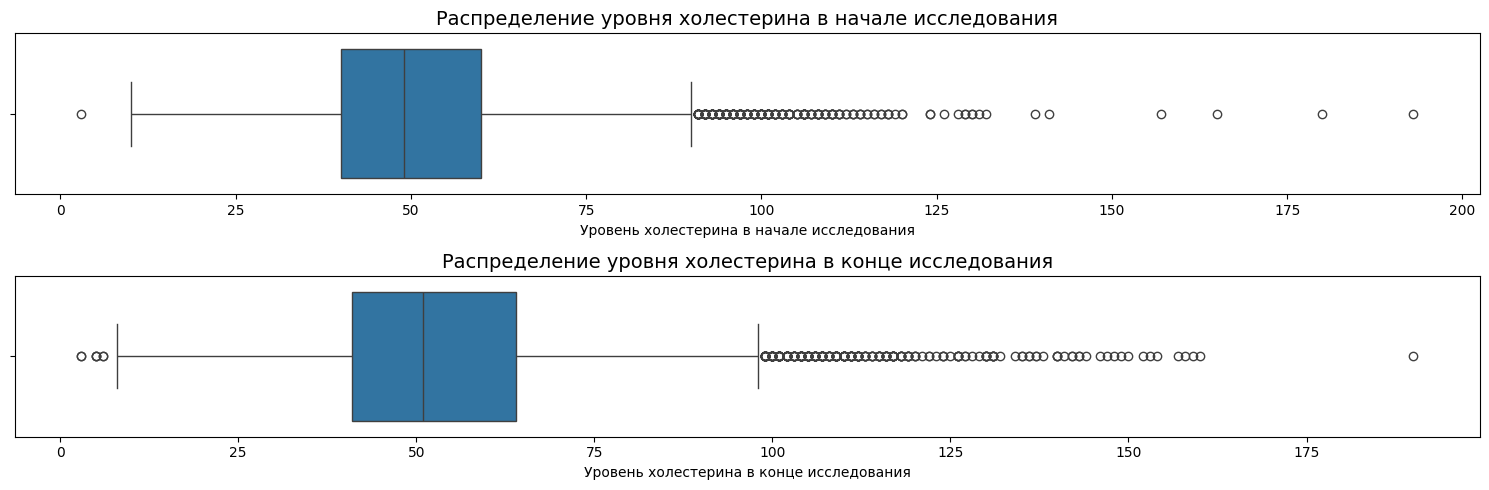

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 5))
boxplot = sns.boxplot(data=general_df, x='chol_value_day_min', ax=axes[0]);
boxplot.set_title('Распределение уровня холестерина в начале исследования', fontsize=14);
boxplot.set_xlabel('Уровень холестерина в начале исследования', fontsize=10)

boxplot = sns.boxplot(data=general_df, x='chol_value_day_max', ax=axes[1]);
boxplot.set_title('Распределение уровня холестерина в конце исследования', fontsize=14);
boxplot.set_xlabel('Уровень холестерина в конце исследования', fontsize=10);

fig.tight_layout()


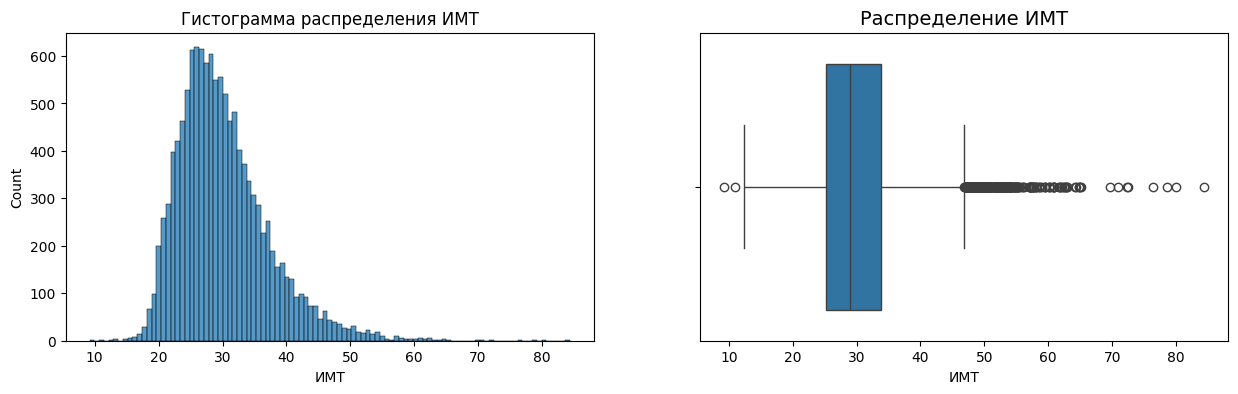

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=general_df, x='bmi', ax=axes[0]);
histplot.set_title('Гистограмма распределения ИМТ');
histplot.set_xlabel('ИМТ', fontsize=10);

boxplot = sns.boxplot(data=general_df, x='bmi', ax=axes[1]);
boxplot.set_title('Распределение ИМТ', fontsize=14);
boxplot.set_xlabel('ИМТ', fontsize=10);

In [71]:
fib_data = general_df.query('fib4_value_day_min > 2.67')

fib_data

,id,age,male,weight,height,bmi,case.id,futime,status,chol_day_min,...,sbp_day_max,sbp_value_day_max,fib4_day_min,fib4_value_day_min,fib4_day_max,fib4_value_day_max,smoke_day_min,smoke_value_day_min,smoke_day_max,smoke_value_day_max
3,4,56,1,109.3,170.0,37.830100,6628.0,3143,0,-1273.0,...,30.0,109.0,-85.0,4.554200,-85.0,4.554200,NaN,NaN,NaN,NaN
9,10,79,0,56.6,155.0,23.718527,13518.0,2239,1,-4365.0,...,2232.0,152.0,-937.0,4.719419,-937.0,4.719419,NaN,NaN,NaN,NaN
11,12,59,1,84.9,182.0,25.519397,2717.0,1596,0,-4723.0,...,NaN,NaN,-1052.0,3.175664,-1052.0,3.175664,NaN,NaN,NaN,NaN
13,15,51,1,88.9,179.0,27.744785,15.0,3105,0,-4505.0,...,696.0,134.0,1549.0,3.080000,1549.0,3.080000,NaN,NaN,NaN,NaN
14,16,73,1,87.3,178.0,27.451085,16.0,4823,0,-3230.0,...,-731.0,134.0,1827.0,3.391543,1827.0,3.391543,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15644,17542,56,0,NaN,157.0,NaN,12731.0,4426,0,-2651.0,...,NaN,NaN,1218.0,2.790895,1218.0,2.790895,3542.0,0.0,4418.0,0.0
15647,17545,49,0,58.5,167.0,20.982905,12178.0,3296,0,-3199.0,...,-2497.0,108.0,3073.0,3.641846,3073.0,3.641846,NaN,NaN,NaN,NaN
15655,17553,58,1,93.2,181.0,28.321755,17553.0,1068,0,-4264.0,...,NaN,NaN,-840.0,3.527668,-840.0,3.527668,NaN,NaN,NaN,NaN
15658,17557,46,1,72.6,167.0,26.013913,9880.0,1364,0,-1666.0,...,-729.0,127.0,-730.0,12.833988,-730.0,12.833988,NaN,NaN,NaN,NaN


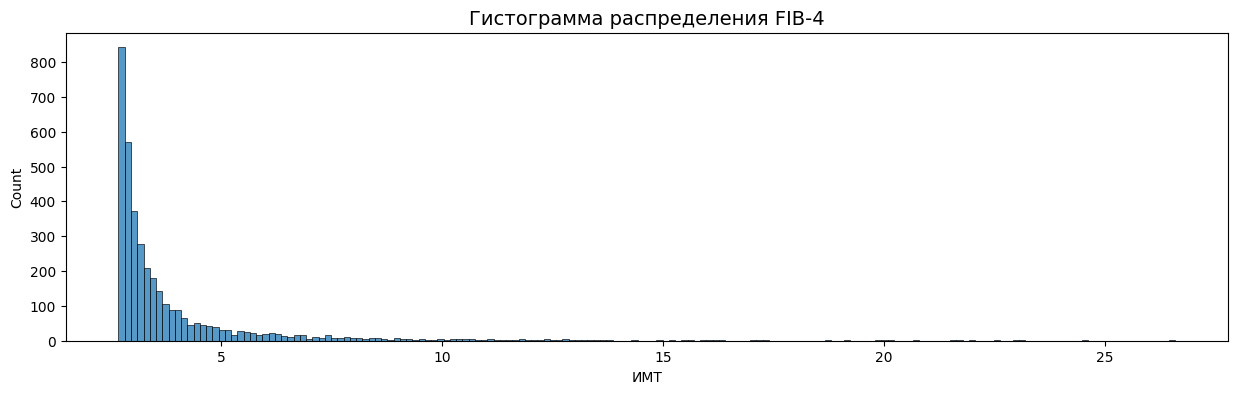

In [57]:
fig = plt.subplots(figsize=(15, 4))
histplot = sns.histplot(data=fib_data, x='fib4_value_day_min');
histplot.set_title('Гистограмма распределения FIB-4', fontsize=14);
histplot.set_xlabel('ИМТ', fontsize=10);


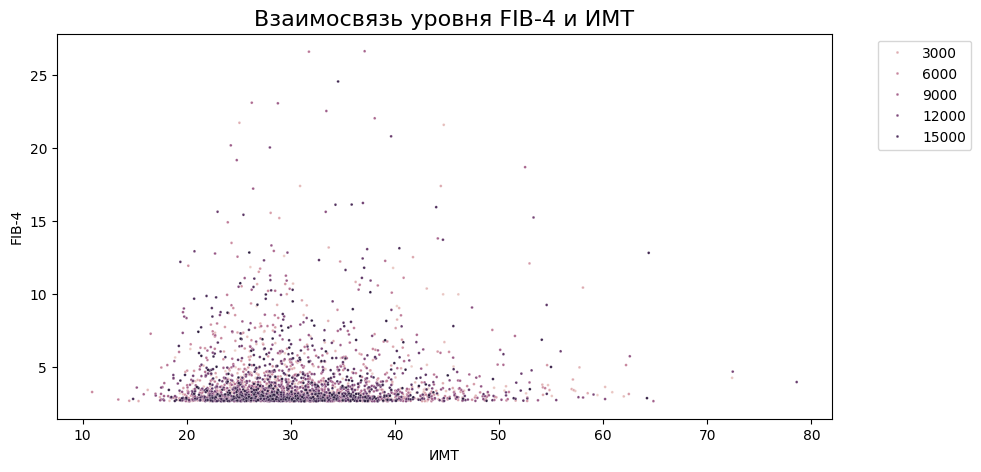

In [35]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=general_df,
    x='bmi',
    y='fib4_value_day_min',
    hue='id',
    s=4,
    sizes=(100, 400)

)
scatterplot.set_title('Взаимосвязь уровня FIB-4 и ИМТ', fontsize=16)
scatterplot.set_xlabel('ИМТ')
scatterplot.set_ylabel('FIB-4');
scatterplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

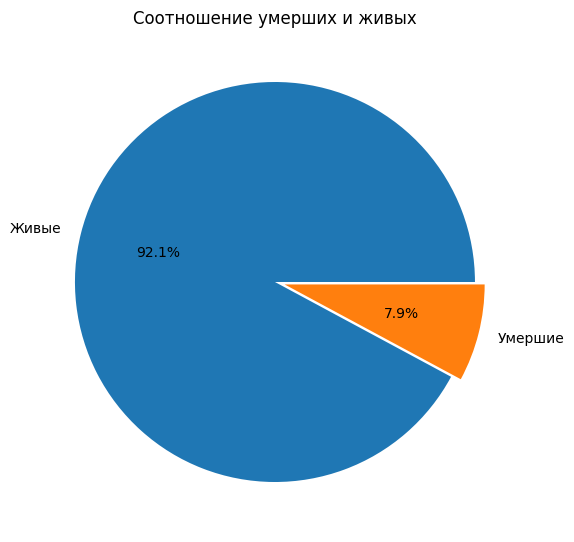

In [36]:
status_data = general_df.groupby(['status'])['id'].count()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    status_data,
    autopct='%.1f%%',
    explode = [0.0, 0.05],
    labels=['Живые', 'Умершие']
);
axes.set_title('Соотношение умерших и живых');

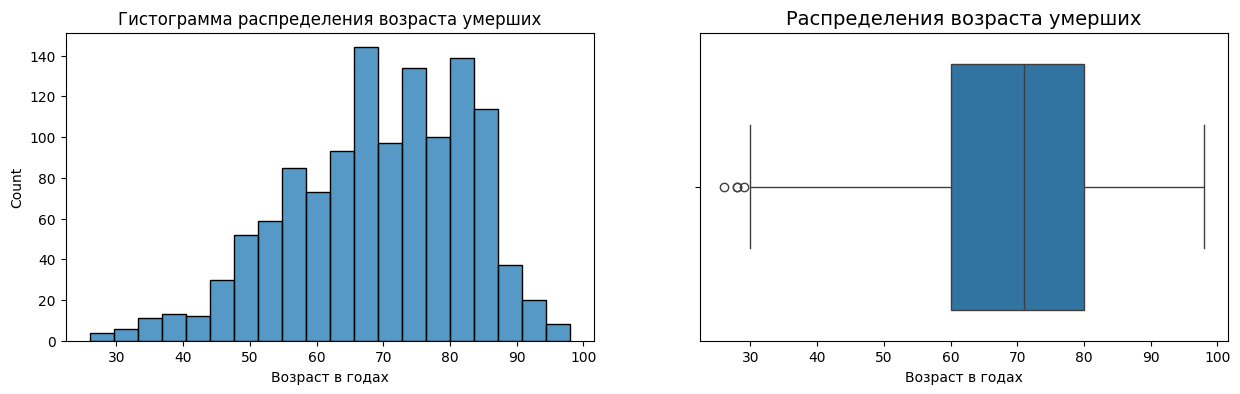

In [37]:
dead_data = general_df.query('status == 1')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=dead_data, x='age', ax=axes[0]);
histplot.set_title('Гистограмма распределения возраста умерших');
histplot.set_xlabel('Возраст в годах', fontsize=10);

boxplot = sns.boxplot(data=dead_data, x='age', ax=axes[1]);
boxplot.set_title('Распределения возраста умерших', fontsize=14);
boxplot.set_xlabel('Возраст в годах', fontsize=10);

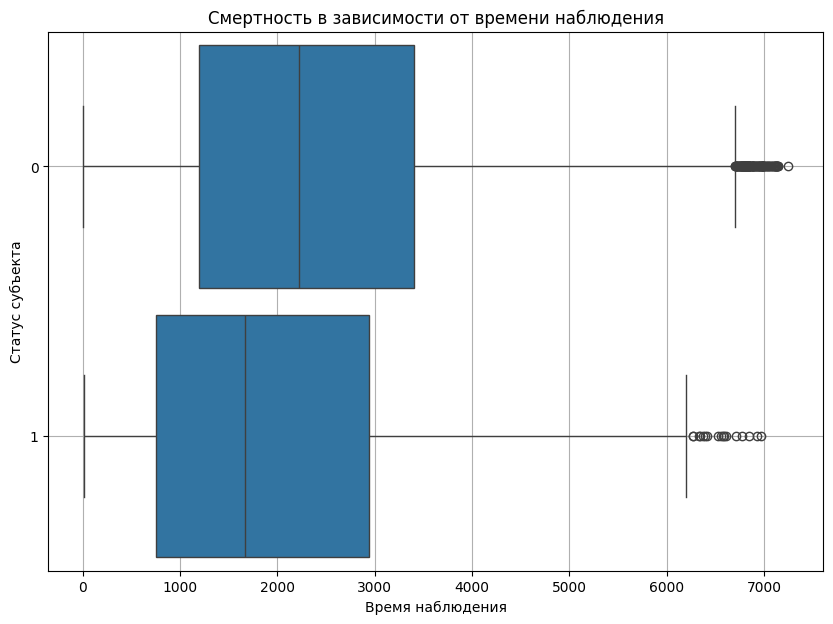

In [72]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=general_df,
    y='status',
    x='futime',
    orient='h',
    width=0.9,
)
boxplot.set_title('Смертность в зависимости от времени наблюдения');
boxplot.set_xlabel('Время наблюдения');
boxplot.set_ylabel('Статус субъекта');
boxplot.grid()

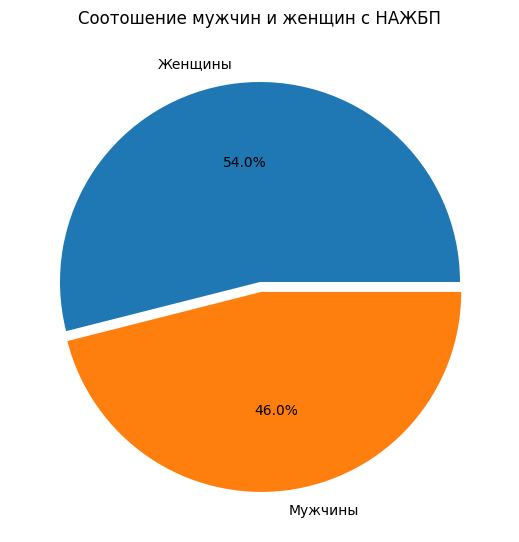

In [73]:
male_data = general_df.groupby(['male'])['id'].count()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    male_data,
    autopct='%.1f%%',
    explode = [0.0, 0.05],
    labels=['Женщины', 'Мужчины']);
axes.set_title('Соотошение мужчин и женщин с НАЖБП');

# Очистка данных

In [74]:
isnull_data = general_df.isnull().mean().round(2).sort_values(ascending=False)
isnull_data

smoke_day_min          0.79
smoke_value_day_max    0.79
smoke_day_max          0.79
smoke_value_day_min    0.79
fib4_day_min           0.76
fib4_value_day_max     0.76
fib4_day_max           0.76
fib4_value_day_min     0.76
sbp_day_min            0.52
sbp_day_max            0.52
sbp_value_day_min      0.52
sbp_value_day_max      0.52
bmi                    0.22
weight                 0.21
height                 0.11
chol_day_min           0.03
chol_value_day_min     0.03
chol_day_max           0.03
chol_value_day_max     0.03
status                 0.00
futime                 0.00
male                   0.00
id                     0.00
case.id                0.00
age                    0.00
dtype: float64

In [75]:
#отбрасываем столбцы с числом пропусков более 30% (100-70)
thresh = general_df.shape[0] * 0.7
cleaned = general_df.dropna(thresh=thresh, axis=1)

In [76]:
cleaned.duplicated().mean()*100

np.float64(0.0)

In [77]:
outliers_h_high = cleaned[cleaned['height'] > 210] 
outliers_h_small = cleaned[cleaned['height'] < 140]
outliers_bmi = cleaned[cleaned['bmi'] < 12] 

cleaned = cleaned.drop(outliers_h_small.index, axis=0)
cleaned = cleaned.drop(outliers_h_high.index, axis=0)
cleaned = cleaned.drop(outliers_bmi.index, axis=0)

print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 15638


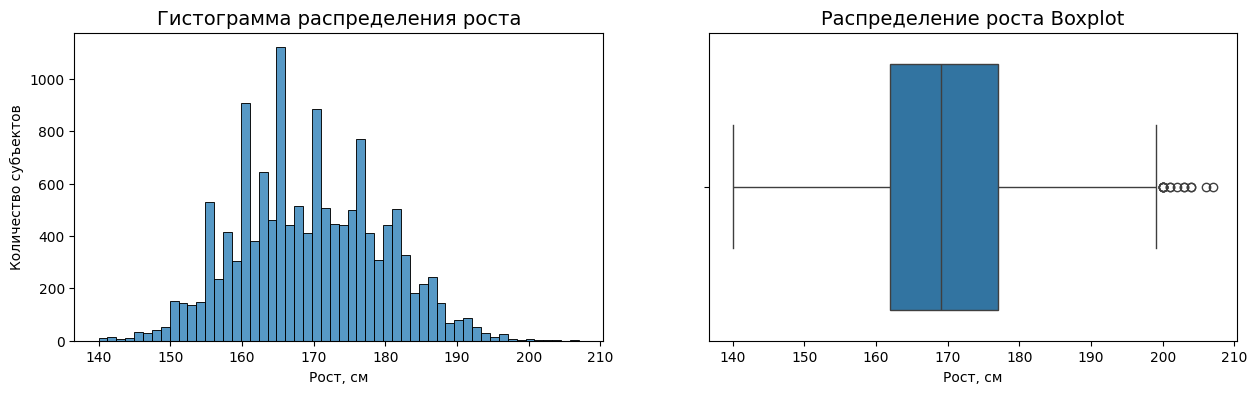

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=cleaned, x='height', ax=axes[0]);
histplot.set_title('Гистограмма распределения роста', fontsize=14);
histplot.set_xlabel('Рост, см', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=cleaned, x='height', ax=axes[1]);
boxplot.set_title('Распределение роста Boxplot', fontsize=14);
boxplot.set_xlabel('Рост, см', fontsize=10);

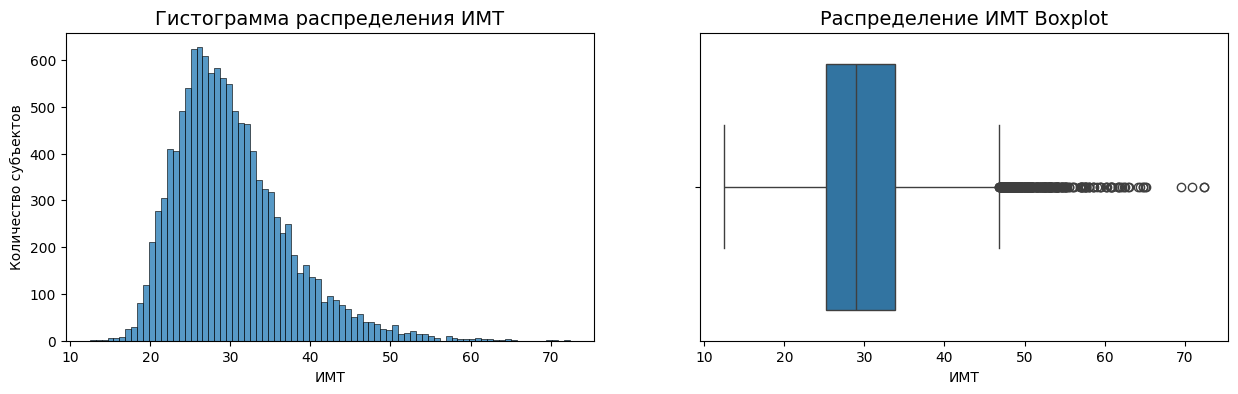

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

histplot = sns.histplot(data=cleaned, x='bmi', ax=axes[0]);
histplot.set_title('Гистограмма распределения ИМТ', fontsize=14);
histplot.set_xlabel('ИМТ', fontsize=10);
histplot.set_ylabel('Количество субъектов', fontsize=10);


boxplot = sns.boxplot(data=cleaned, x='bmi', ax=axes[1]);
boxplot.set_title('Распределение ИМТ Boxplot', fontsize=14);
boxplot.set_xlabel('ИМТ', fontsize=10);

# Подведение итогов и выводы

Во время работы над данными датасетами я пришла к выводу, что третий предоставленный файл не имеет никакого отношения к первым двум, поэтому не стала объединять все таблицы, огранившись только лишь первыми двумя. 

В объединенном датасете оказалось достаточно много пропусков в измеряемых показателях, поэтому пришлось избавиться от всех, кроме уровня холестерина. Жаль только, что в показателе индекса FIB-4 76% пропусков, было бы интересно рассмотреть исследование в разрезе этого индекса.

В исследовании примерно одинаковое соотношение мужчин и женщин, что говорит о том, что НАЖБП болеют и мужчины и женщины в равной степени.

Наличие НАЖБП не приводит к смерти в большинстве случаев (92%). Распределение возраста умерших в среднем от 60 до 90 лет.

Смертность взаимосвязана с длительностью наблюдения. Умершие пациенты наблюдались меньше по времени, чем живые.

На небольшой выборке пациентов с указанным FIB-4 не выявлена зависимость FIB-4 от ИМТ. У всех субъектов с указанным FIB-4, его значение больше 2.67, что свидетельсвует о наличии выраженного фиброза печени.

Уровень холестерина не отличался в начале исследования и в конце, даже повысился в динамике.



